In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

Yukarıda kutuphaneleri 

In [4]:
ay = ['ocak', 'subat', 'mart', 'nisan', 'mayis', 'haziran', 'temmuz', 'agustos', 'eylul', 'ekim', 'kasim', 'aralik'] 

In [5]:
start_month = "ocak"

In [6]:
_year = 2022

In [7]:
_ay = 4

In [8]:
df = pd.read_excel("bins_ham.xls", sheet_name = "adiyaman")

In [9]:
print(df[(df.Yil == _year) & (df.Ay == 2)].head())

                        date   Yil  Ay      act  end     cap
9503 2022-02-01 00:00:09.005  2022   2  22197.0  0.0  3126.0
9504 2022-02-01 01:00:09.010  2022   2  19680.0  0.0  3408.0
9505 2022-02-01 02:00:09.015  2022   2  17959.0  0.0  3524.0
9506 2022-02-01 03:00:09.020  2022   2  17267.0  0.0  3567.0
9507 2022-02-01 04:00:09.025  2022   2  17001.0  0.0  3454.0


In [11]:
aktif = {ay[x-1]:int(df[(df.Yil == _year) & (df.Ay == x)].act.sum()) for x in range(ay.index(start_month), len(ay)+1)} #ocaktan itibaren aliyoruz, ileriki bir ay icin range'in ilk değeri ilerletilmeli
print(aktif)

{'aralik': 0, 'ocak': 16722977, 'subat': 11793155, 'mart': 11382718, 'nisan': 0, 'mayis': 0, 'haziran': 0, 'temmuz': 0, 'agustos': 0, 'eylul': 0, 'ekim': 0, 'kasim': 0}


In [12]:
enductive = {ay[x-1]:int(df[(df.Yil == _year) & (df.Ay == x)].end.sum()) for x in range(ay.index(start_month), len(ay)+1)} #ocaktan itibaren aliyoruz, ileriki bir ay icin range'in ilk değeri ilerletilmeli
print(len(enductive))

12


In [13]:
capacitive = {ay[x-1]:int(df[(df.Yil == _year) & (df.Ay == x)].cap.sum()) for x in range(ay.index(start_month), len(ay)+1)} #ocaktan itibaren aliyoruz, ileriki bir ay icin range'in ilk değeri ilerletilmeli
print(len(capacitive))

12


In [9]:
len(ay[2:])

10

In [14]:
end_ratio = {ay[x-1]: round((enductive[ay[x-1]]/aktif[ay[x-1]])*100,1) for x in range(ay.index(start_month), len(ay)+1)} #ocaktan itibaren aliyoruz, ileriki bir ay icin range'in ilk değeri ilerletilmeli
print(end_ratio)
plt.plot(ay,end_ratio.values(), 'go--', linewidth=2, markersize=12) # ileriki bir aydan baslanilmasi gerekiyor ise ornegin mart icin ay[2:] seklinde y deki ay verisi de degismeli
plt.xlabel("Aylar")
plt.ylabel("Enduktif Oran")
plt.show()

ZeroDivisionError: division by zero

In [15]:
cap_ratio = {ay[x-1]: round((capacitive[ay[x-1]]/aktif[ay[x-1]])*100,1) for x in range(1, 13)} #ocaktan itibaren aliyoruz, ileriki bir ay icin range'in ilk değeri ilerletilmeli
print(cap_ratio)
plt.plot(ay[:],cap_ratio.values(), 'bo--', linewidth=2, markersize=12)
plt.xlabel("Aylar")
plt.ylabel("Kapasitif Oran")
plt.show()

ZeroDivisionError: division by zero

In [16]:
print(len(df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap))

744


In [17]:
print(df[(df.Yil == _year) & (df.act != 0)].act.max()/100*5)

1863.6000000000001


 Alttaki satirda verilen aya ait kapasitif degerlerin maksimum ve minimum değerlerini cikaralim.

In [19]:
print(df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap.max())
print(df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap.min())

4491.0
70.0


Ornek olmasi adina ihtiyac duyulan optimal(ornegin %7,5 kapasitif oranina dusuren) reaktor gucunu belirlemek adina gruplandirma yapılmakta.

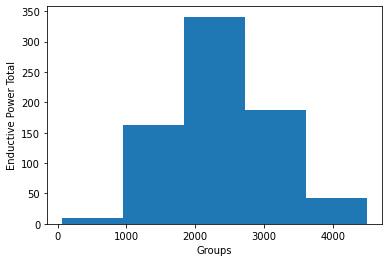

In [21]:
_ = plt.hist(df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap, bins = 5)
_ = plt.xlabel('Groups')
_ = plt.ylabel('Enductive Power Total')
plt.show()

ortada bariz sekilde gorunen kapasitif yukun ortalaması ve buyuklugunu kontrol edelim ki buna karsilik bir reaktor ekledigimizde yeni oranin ne olacagina bakalım.

In [23]:
round(df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap[df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap.between(980,1470)].mean())

1272

In [24]:
round(df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap[df[(df.Yil == _year) & (df.Ay == 3) & (df.cap != 0)].cap.between(980,1470)].mean())

1272

hangi ayda ne kadar aktif reaktif tuketimi ya da oran gerceklesmis bunu kaydedecek olursak.

belirledigimiz gucteki reaktorun ilgili kapasitif degerlerinden cikardigimizda enduktif ya da kapasitif tarafta ne gibi degisiklikler olduguna bakalim.

In [25]:
len(enductive)

12

her girdi verisinde calismasi icin veri tablosunun bir sabit sablonunun olmasi gerekmakte. Ornegin;
Tarih, Yil, Ay, aktif, End, Cap kolonlari gibi. sanirim reaktif hesaplari icin bu veriler yeterli olacaktir. Not: afsin_a_cap yalnizca Cap (kolon basligi) olacak sekilde guncellenmeli

In [26]:
#ay, Yil, reaktor_gucu ve serit aktif, kapasitif,induktif verilerini iceren dataframe kabul eder.
def sabit_reaktor_anahtarlamali(yil, ay, reaktor_gucu, tolerance, df):
    extracted = []
    cap = df[(df.Yil == yil) & (df.Ay == ay)].cap.tolist()
    act = df[(df.Yil == yil) & (df.Ay == ay)].act.tolist()
    end = df[(df.Yil == yil) & (df.Ay == ay)].end.tolist()
    total_a = 0
    total_c = 0
    total_e = 0
    instant_end = 0
    switching = []
    for c, a, e in zip(cap,act,end):
        total_a += a
        
        if c > reaktor_gucu:
            extracted.append(c-reaktor_gucu)
            switching.append(1)
            total_c += (c-reaktor_gucu)
            total_e += e
            
        elif 0 < c <= reaktor_gucu:
            
            #total_e 'yi takip etmek belkide yeterli olabilir.
            if ((total_e/total_a*100) < 20) and (a > 0):
                instant_end = e + abs(c-reaktor_gucu) #before switch on the reactor!
                
                if (instant_end/a*100) < (20-tolerance):
                    #print(round(instant_end/a*100),2)                   
                    extracted.append(c-reaktor_gucu)
                    switching.append(1)
                    total_e += (e + abs(c-reaktor_gucu))
                    instant_end = 0
                else:
                    extracted.append(c) #reaktor devreden cikmistir.Yalnizca kapasitif kalir
                    total_e += e
                    total_c += c
                    instant_end = 0
                    switching.append(0)
                    
            else:
                extracted.append(c)
                total_e += e
                total_c += c
                switching.append(0)
                
        else:
            #reaktor devre disi kalmali ve end ve cap degerleri oldugu gibi alinmali
            extracted.append(0)
            total_e += e
            total_c += c
            switching.append(0)
    #we return the profile of the last reaktifs, old end. ratio, new cap ratio, new end ratio and switchings
    try:
        _e = (total_e/total_a*100)
    except ZeroDivisionError:
        _e = 0
    try:
        _c = (total_c/total_a*100)
    except ZeroDivisionError:
        _c = 0
    try:
        _old_e = round(sum(end)/sum(act)*100,2)
    except ZeroDivisionError:
        _old_e = 0
    
    return extracted, _e, _c, _old_e, switching

In [27]:
def cb_switch_count(switchings):
    cb_switches = [1 if x!=switchings[ind-1] else 0 for ind, x in enumerate(switchings)]
    return sum(cb_switches)

In [28]:
df[(df.Yil == _year) & (df.Ay == 3) & (df.act == 0)]

,date,Yil,Ay,act,end,cap


In [31]:
df2 = pd.DataFrame({'with_react': [],'active': [], 'end': [], 'cap': []})
df2['with_react'], ratio_e, ratio_c, ratio_base, switches = sabit_reaktor_anahtarlamali(yil = _year, ay = 3, reaktor_gucu = 2000, 
                                                                                        tolerance = 5, df = df)
#df2['active'] = df[(df.Yil == _year) & (df.Ay == _ay)].act.tolist()
#df2['end'] = df[(df.Yil == _year) & (df.Ay == _ay)].end.tolist()
#df2['cap'] = df[(df.Yil == _year) & (df.Ay == _ay)].cap.tolist()
print(len(df2.with_react))
#print(switches)
print("Ay Icindeki Anahtarlama :",cb_switch_count(switches))
print("Enductive Ratio After Comp:",round(ratio_e,2))
print("Capacitive Ratio After Comp :",round(ratio_c,2))
print("Real End Ratio: ",ratio_base)

744
Ay Icindeki Anahtarlama : 8
Enductive Ratio After Comp: 0.73
Capacitive Ratio After Comp : 3.42
Real End Ratio:  0.0


In [32]:
#Reaktorun kontrolsuzce ay boyunca devrede kalması durumunda olusan oranları veren fonksiyon (df icinde gerekli degerler mevcut.)
def sabit_reaktor(yil, ay, reaktor_gucu,df):
    #extracted = []
    cap = df[(df.Yil == yil) & (df.Ay == ay)].cap.tolist()
    act = df[(df.Yil == yil) & (df.Ay == ay)].act.tolist()
    end = df[(df.Yil == yil) & (df.Ay == ay)].end.tolist()
    total_a = 0
    total_c = 0
    total_e = 0
    instant_end = 0
    #switching = []
    for c, a, e in zip(cap,act,end):
        total_a += a
        
        if c > reaktor_gucu:
            #extracted.append(c-reaktor_gucu)            
            total_c += (c-reaktor_gucu)
            total_e += e
            
        elif c <= reaktor_gucu:
            #extracted.append(c-reaktor_gucu)            
            total_e += (e + abs(c-reaktor_gucu))            
        
        else:
            #reaktor devre disi kalmali ve end ve cap degerleri oldugu gibi alinmali
            #extracted.append(0)
            total_e += e
            total_c += c
    #we return the profile of the last reaktifs, old end. ratio, new cap ratio, new end ratio and switchings        
    return (total_e/total_a*100), (total_c/total_a*100), round(sum(end)/sum(act)*100,2)

In [33]:
#df2 = pd.DataFrame({'with_react': [],'active': [], 'end': [], 'cap': []})
ratio_e, ratio_c, ratio_base = sabit_reaktor(yil = _year, ay = 3, reaktor_gucu = 2000, df = df)
print("Enductive Ratio After Comp:",round(ratio_e,2))
print("Capacitive Ratio After Comp :",round(ratio_c,2))
print("Real End Ratio: ",ratio_base)

Enductive Ratio After Comp: 0.83
Capacitive Ratio After Comp : 3.34
Real End Ratio:  0.0


In [32]:
round(df2['end'].sum()/df2['active'].sum()*100)

<ipython-input-32-73220513c024>:1: RuntimeWarning: invalid value encountered in double_scalars
  round(df2['end'].sum()/df2['active'].sum()*100)


ValueError: cannot convert float NaN to integer

In [ ]:
#ay, Yil, kapasitor_gucu ve serit aktif, kapasitif,induktif verilerini iceren dataframe kabul eder.
def sabit_kapasitor_hesapla(yil, ay, cap_gucu, tolerance, df):
    extracted = []
    cap = df[(df.Yil == yil) & (df.Ay == ay)].afsin_a_cap.tolist()
    act = df[(df.Yil == yil) & (df.Ay == ay)].afsin_a_act.tolist()
    end = df[(df.Yil == yil) & (df.Ay == ay)].afsin_a_end.tolist()
    instant_cap = 0
    cap_gucu.sort()
    cap_gucu.reverse()
    for capacitor in cap_gucu:
        total_a = 0
        total_e = 0
        total_c = 0
        extracted = []
        for c, a, e in zip(cap,act,end):
            total_a += a
            if e > capacitor:
                extracted.append(e-capacitor)
                total_e += (e-capacitor)
                total_c += c

            elif 0< c <= capacitor:

                if ((total_c/total_a*100) < 15) and (a > 0):
                    instant_cap = e + abs(e-capacitor)      #before switch on the reactor!

                    if (instant_cap/a*100) < (15-tolerance): #15 is the capacitive limit for panelty
                        #print(round(instant_end/a*100),2)                   
                        extracted.append(e-capacitor)
                        total_c += (c + abs(e-capacitor))
                        instant_end = 0
                    else:
                        extracted.append(e) #kapasitor devreden cikmistir.Yalnizca kapasitif kalir
                        total_e += e
                        total_c += c
                        instant_end = 0               

                else:
                    extracted.append(e)
                    total_e += e
                    total_c += c

            else:
                #reaktor devre disi kalmali ve end ve cap degerleri oldugu gibi alinmali
                extracted.append(0)
                total_e += e
                total_c += c
        
        end = [x if x>=0 else 0 for x in extracted]
    print(total_e, total_c, total_a)    
    return extracted, (total_e/total_a*100), (total_c/total_a*100)

In [ ]:
df2 = pd.DataFrame({'with_cap': [],'active': [], 'end': [], 'cap': []})
df2['with_cap'], ratio_e, ratio_c = sabit_kapasitor_hesapla(yil = _year, ay = 2, cap_gucu = [2400,1800,1200,600], tolerance = 5, df = df)
df2['active'] = df[(df.Yil == 2021) & (df.Ay == 4)].afsin_a_act.tolist()
df2['end'] = df[(df.Yil == 2021) & (df.Ay == 4)].afsin_a_end.tolist()
df2['cap'] = df[(df.Yil == 2021) & (df.Ay == 4)].afsin_a_cap.tolist()
print(len(df2.with_cap))

In [ ]:
print('After compansation %e: ', round(ratio_e,2))
print('After compansation %c: ', round(ratio_c,2))
print('Before compansation %c: ', round(df2['cap'].sum()/df2['active'].sum()*100, 2))
print('Before compansation %e: ', round(df2['end'].sum()/df2['active'].sum()*100, 2))